In [1]:
#Importing libraries
import numpy as np
%matplotlib inline
import seaborn as sn
from matplotlib import pyplot as plt
import pandas as pd

In [7]:
#Reading the Data Set
df = pd.read_excel('Data.xlsx')

In [9]:
#Displaying the head of the data
df.head()

,GPA,Steps,Cardio,FatBurn,Minutes
0,4.00,11157,3.86,111.92,9.35
1,3.26,7986,15.53,249.29,8.20
2,3.07,11602,2.10,195.32,12.73
3,4.00,10609,6.51,121.75,10.00
4,2.87,14552,6.09,109.66,8.63


In [10]:
#Info about the data, how many rows and coloumns, data types and whether there are null values or not.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GPA      581 non-null    float64
 1   Steps    581 non-null    int64  
 2   Cardio   581 non-null    float64
 3   FatBurn  581 non-null    float64
 4   Minutes  581 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 22.8 KB


In [12]:
df.describe() #Descirption of the data before removing outliers.

,GPA,Steps,Cardio,FatBurn,Minutes
count,581.000000,581.000000,581.000000,581.000000,581.000000
mean,3.186919,10229.024096,9.007694,148.726454,10.161015
std,0.757748,3067.141829,16.465780,96.495032,3.139881
min,0.000000,0.000000,0.000000,0.000000,5.380000
25%,2.840000,8506.000000,2.340000,82.430000,7.670000
50%,3.350000,10284.000000,4.600000,122.000000,9.350000
75%,3.780000,12082.000000,8.950000,189.690000,12.150000
max,4.000000,20331.000000,180.650000,729.670000,21.070000


<AxesSubplot:xlabel='GPA'>

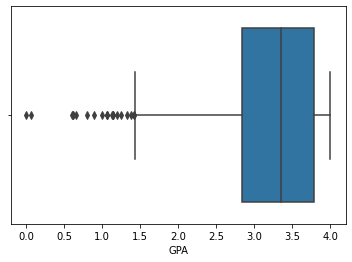

In [13]:
#Box plots to visualize outliers in the coloumns GPA, Steps, Cardio , FatBurn and Minutes.
sn.boxplot(x= 'GPA' , data = df)

<AxesSubplot:xlabel='Steps'>

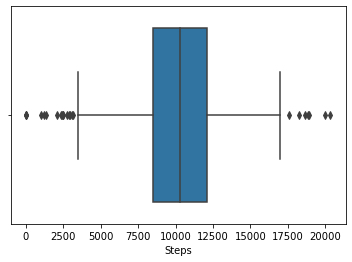

In [14]:
sn.boxplot(x= 'Steps' , data = df)

<AxesSubplot:xlabel='Cardio'>

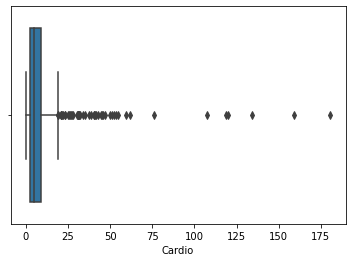

In [15]:
sn.boxplot(x= 'Cardio' , data = df)

<AxesSubplot:xlabel='FatBurn'>

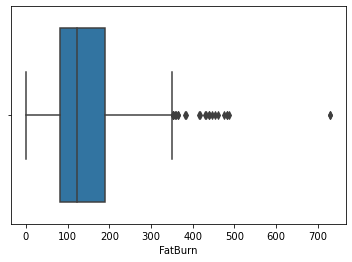

In [16]:
sn.boxplot(x= 'FatBurn' , data = df)

<AxesSubplot:xlabel='Minutes'>

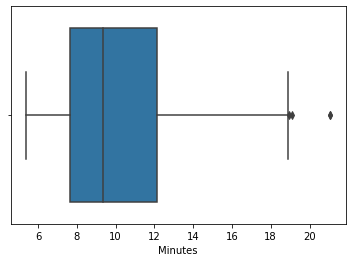

In [17]:
sn.boxplot(x= 'Minutes' , data = df)

In [18]:
#It is clear that there is a lot of outliers in most of the data coloumns, 
#which will affect our analysis, so we must omit them using the follow functions
def removeOutliers (col):
    for x in [col]:
        q75,q25 = np.percentile(df.loc[:,x],[75,25])
        intr_qr = q75-q25
 
        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
 
        df.loc[df[x] < min,x] = np.nan
        df.loc[df[x] > max,x] = np.nan

In [19]:
#Setting the outliers to NULL in each coloumn in the data set.
removeOutliers('GPA')
removeOutliers('Steps')
removeOutliers('Cardio')
removeOutliers('FatBurn')
removeOutliers('Minutes')

In [20]:
#To see how many rows contain NULL (how many outliers there are)
df.isnull().sum()

GPA        21
Steps      23
Cardio     49
FatBurn    25
Minutes     4
dtype: int64

In [21]:
#Removing rows that contain Null values in the whole data set
df = df.dropna(axis = 0)

In [22]:
#To check the number of outliers after deleting them (it should be 0 now)
df.isnull().sum()

GPA        0
Steps      0
Cardio     0
FatBurn    0
Minutes    0
dtype: int64

In [23]:
#To check data description after cleaning it from outliers
df.describe()

,GPA,Steps,Cardio,FatBurn,Minutes
count,476.000000,476.000000,476.000000,476.000000,476.000000
mean,3.297584,10418.823529,5.468508,135.124265,10.054727
std,0.612078,2628.912351,3.982181,67.548966,2.978137
min,1.430000,3505.000000,0.000000,1.370000,5.380000
25%,2.927500,8700.500000,2.375000,84.370000,7.660000
50%,3.410000,10416.500000,4.335000,118.385000,9.330000
75%,3.810000,12147.250000,7.655000,175.845000,11.950000
max,4.000000,16962.000000,18.760000,344.720000,18.870000


In [40]:
#To visualize data after cleaning, we will use box plots and histograms.
#we won't use pie charts or bar charts because the data is not discrete.

<AxesSubplot:xlabel='GPA'>

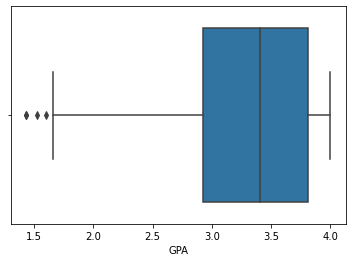

In [42]:
sn.boxplot(x = 'GPA', data = df)

<AxesSubplot:xlabel='Steps'>

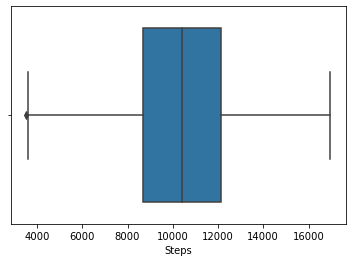

In [43]:
sn.boxplot(x = 'Steps', data = df)

<AxesSubplot:xlabel='Cardio'>

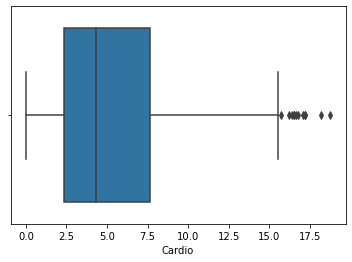

In [44]:
sn.boxplot(x = 'Cardio', data = df)

<AxesSubplot:xlabel='FatBurn'>

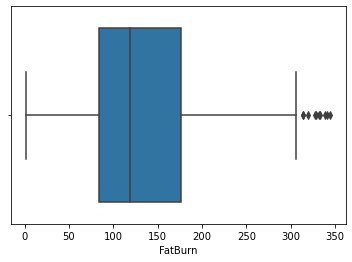

In [45]:
sn.boxplot(x = 'FatBurn', data = df)

<AxesSubplot:xlabel='Minutes'>

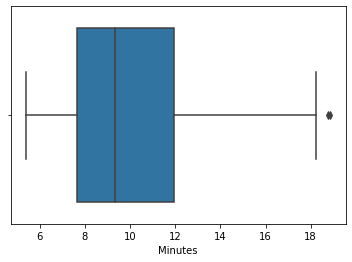

In [46]:
sn.boxplot(x = 'Minutes', data = df)

<AxesSubplot:xlabel='GPA', ylabel='Count'>

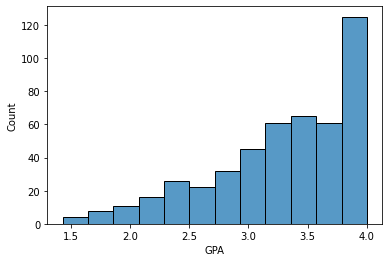

In [47]:
sn.histplot(x = 'GPA', data = df)

<AxesSubplot:xlabel='Steps', ylabel='Count'>

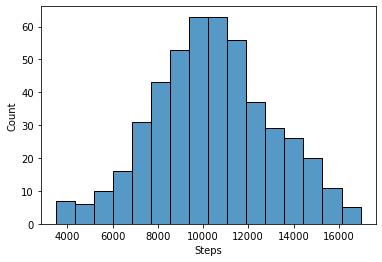

In [25]:
sn.histplot(x = 'Steps', data = df)

<AxesSubplot:xlabel='Cardio', ylabel='Count'>

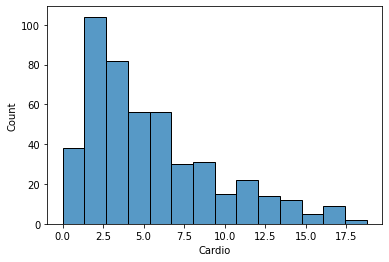

In [26]:
sn.histplot(x = 'Cardio', data = df)

<AxesSubplot:xlabel='FatBurn', ylabel='Count'>

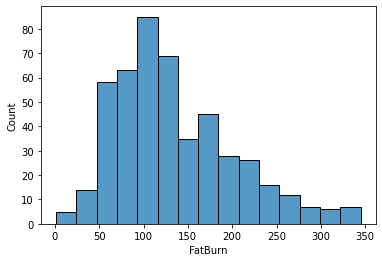

In [27]:
sn.histplot(x = 'FatBurn', data = df)

<AxesSubplot:xlabel='Minutes', ylabel='Count'>

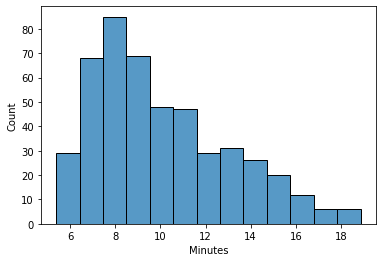

In [28]:
sn.histplot(x = 'Minutes', data = df)

In [29]:
#Cleaned data info and head
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 0 to 580
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GPA      476 non-null    float64
 1   Steps    476 non-null    float64
 2   Cardio   476 non-null    float64
 3   FatBurn  476 non-null    float64
 4   Minutes  476 non-null    float64
dtypes: float64(5)
memory usage: 22.3 KB


In [30]:
df.head()

,GPA,Steps,Cardio,FatBurn,Minutes
0,4.00,11157.0,3.86,111.92,9.35
1,3.26,7986.0,15.53,249.29,8.20
2,3.07,11602.0,2.10,195.32,12.73
3,4.00,10609.0,6.51,121.75,10.00
4,2.87,14552.0,6.09,109.66,8.63


In [31]:
#To display the pairwise correlation of all coloumns in the dataframe
df.corr()

,GPA,Steps,Cardio,FatBurn,Minutes
GPA,1.000000,0.344448,0.271548,0.112058,-0.131819
Steps,0.344448,1.000000,0.242399,0.183934,-0.292140
Cardio,0.271548,0.242399,1.000000,0.353528,-0.003929
FatBurn,0.112058,0.183934,0.353528,1.000000,0.256854
Minutes,-0.131819,-0.292140,-0.003929,0.256854,1.000000


<AxesSubplot:>

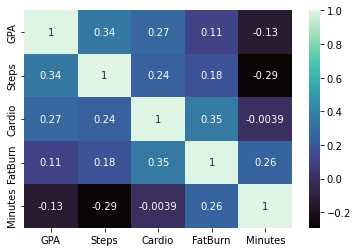

In [39]:
#Display heatmap to visualize the correlation
sn.heatmap(df.corr(),cmap= "mako" ,annot = True)

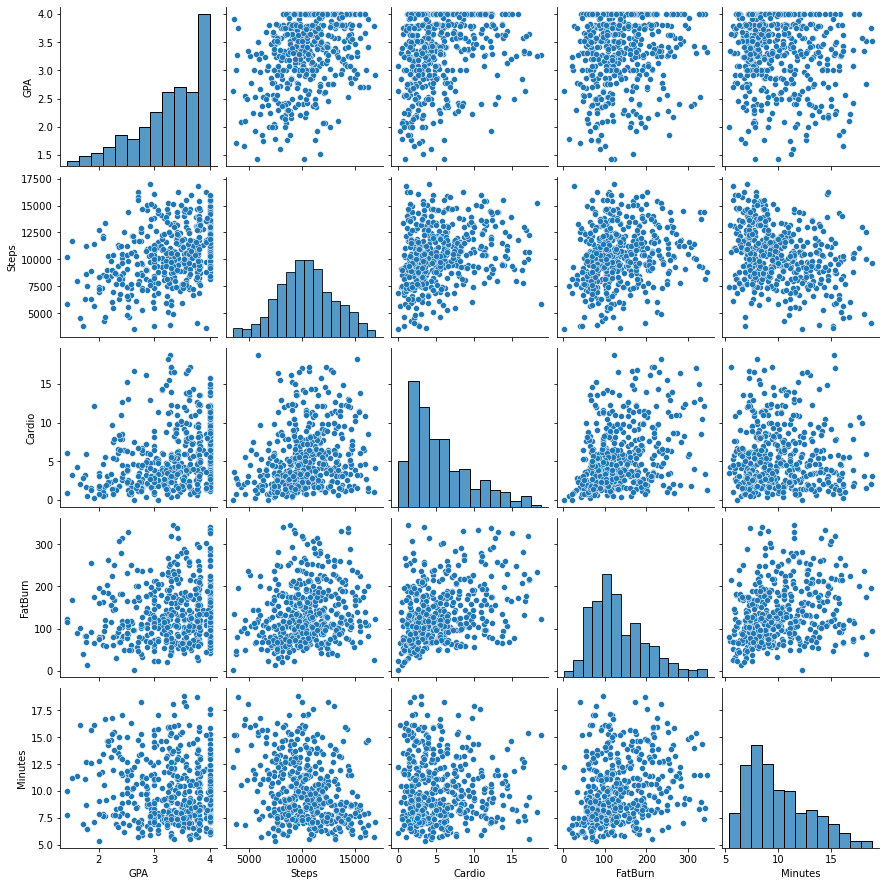

In [48]:
#A pair plot to see the regression between differnet data coloumns
sn.pairplot(df)

In [50]:
#The next section invokes a simple linear regression machine learning model

In [51]:
#Assigning the values to the dependent variable
y = df.GPA.values

In [52]:
#Assigning the values to the independent variable
x = df[["Steps" , "Cardio" , "FatBurn","Minutes"]].values

In [53]:
#Splitting data into training data (80%) and testing data (20%)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 0)

In [54]:
#Putting the independent data in a standarm form (bell shaped curve) for optimizied performance
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [55]:
#Training the model with the train data
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [56]:
#Predicting outputs using the model, where the model predicts y using the testing data in the x
y_pred = lr.predict(x_test)

In [57]:
#Checking the r2score of the lr model to check for success rate, by comparing the actual test data 
#y to the predicted y
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.12484631346271435

In [ ]:
#Since the correlation between the data is mostly weak,
#the success rate of the linear regression based machine learning model is very low.